# Detailed Description of the dataset

Abstract - For this assignment, we examine the Census Income dataset available at the UC Irvine Machine Learning Repository. We aim to predict whether an individual’s income will be greater than $50,000 per year based on several attributes from the census data.

### INTRODUCTION

The US Adult Census dataset is a repository of 48,842 entries extracted from the 1994 US Census database.

->In our first section, we explore the data at face value in order to understand the trends and representations of certain demographics in the corpus.

->We then use this information in section two to form models to predict whether an individual made more or less than $50,000 in 1994.

->In the third section, we look into a couple papers written on the dataset to find out what methods they are using to gain insight on the same data.

->Finally, in the fourth section, we compare our models as well as that of others in order to find out what features are of significance, what methods are most effective, and gain an understanding of some of the intuition behind the numbers.

## Description of features

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

● age: the age of an individual 
   ->Integer greater than 0

● workclass: a general term to represent the employment status of an individual
   ->Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov, Without­pay, Never­worked.

● fnlwgt: final weight. In other words, this is the number of people the census believes the entry represents..
   ->Integer greater than 0

● education: the highest level of education achieved by an individual.
   ->Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc, 9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool.

● education­num: the highest level of education achieved in numerical form.
   ->Integer greater than 0

● marital­status: marital status of an individual.
   ->Married­civ­spouse, Divorced, Never­married, Separated, Widowed, Married­spouse­absent, Married­AF­spouse.
Married­civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces. 

● occupation: the general type of occupation of an individual
   ->Tech­support, Craft­repair, Other­service, Sales, Exec­managerial, Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical, Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv, Armed­Forces.

● relationship: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all.
   ->Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried.

● race: Descriptions of an individual’s race
   ->White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black.

● sex: the biological sex of the individual
   ->Male, Female

● capital­gain: capital gains for an individual
   ->Integer greater than or equal to 0

● capital­loss: capital loss for an individual
   ->Integer greater than or equal to 0

● hours­per­week: the hours an individual has reported to work per week
   ->continuous.

● native­country: country of origin for an individual
   ->United­States, Cambodia, England, Puerto­Rico, Canada, Germany, Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador, Trinadad&Tobago, Peru, Hong, Holand­Netherlands.

● the label: whether or not an individual makes more than $50,000 annually
   -> <=50k, >50

In [83]:
# Importing the required libraries

import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats # Statistics
import warnings
warnings.filterwarnings('ignore')# Avoid warnings

In [84]:
# Importing the data

df = pd.read_csv("adult.csv")


In [85]:
# Viewing the data

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [86]:
# Shape of the dataset

df.shape



(48842, 15)

In [87]:
# Summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [88]:
# Statistical details of the dataframe 

df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [89]:
# Numerical Columns

num_data = df.select_dtypes(['int64','float64'])

num_cols = num_data.columns

print('Numerical Columns : {}'.format(list(num_cols)))

Numerical Columns : ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [90]:
# Categorical Columns

cat_data = df.select_dtypes(['object'])

cat_cols = cat_data.columns

print('categorical Columns : {}'.format(list(cat_cols)))

categorical Columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


# Univariate Analysis

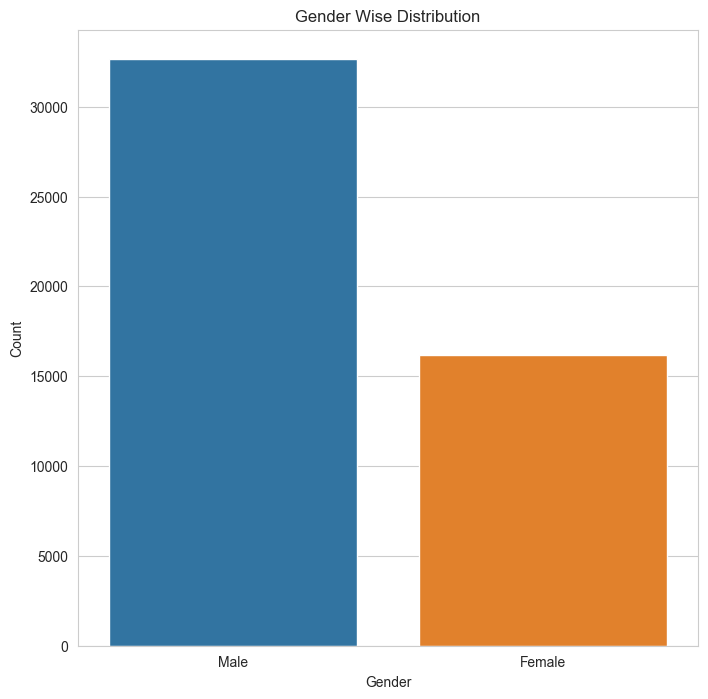

In [91]:
# Checking Marital Status of Individual

plt.figure(figsize = (8,8))

x = list(df['gender'].value_counts().index)

y = list(df['gender'].value_counts())

plt.title('Gender Wise Distribution')

plt.xlabel('Gender')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.show()

From Marital Status of Individual we can see that Males are high in number than Female. 

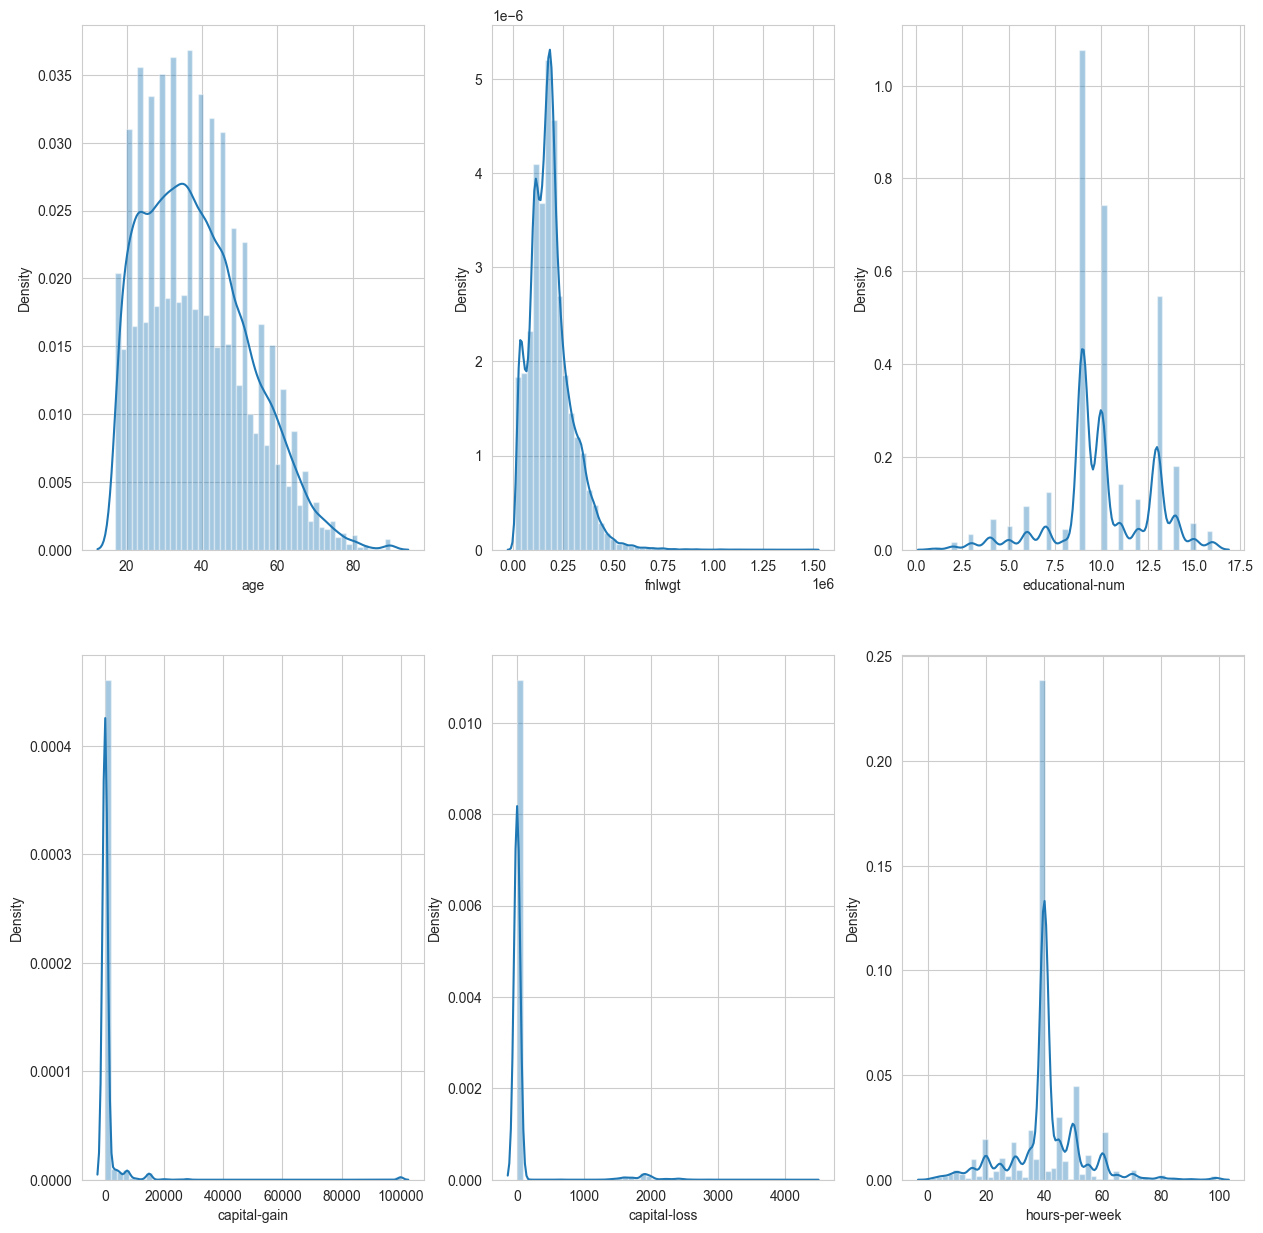

In [92]:
# Probablity Density Function Plots of Numerical Columns

plt.figure(figsize=(15,15))

cols = list(num_cols)

i = 1

for col in cols:
    
    plt.subplot(2,3,i)
    sns.distplot(df[col])
    
    i = i+1

Probablity Density Function Plots of Numerical Columns is shown above all are not uniformly distrubited and some are having skewness.

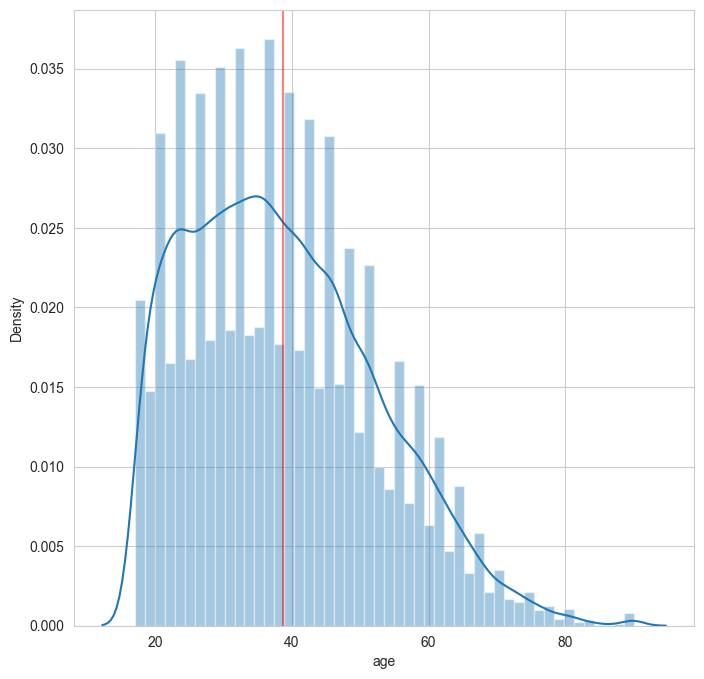

In [93]:
# Age Distribution

plt.figure(figsize=(8,8))

sns.distplot(df['age'])

plt.axvline(df['age'].mean(),c='r',alpha=0.5)

plt.show()

In [94]:
df['age'].skew()

0.5575803166133181

Age Distribution is Right Skewed Distribution may be because of the presence of outliers to the positive side(right)

In [95]:
y = list(df['age'].value_counts())

print(y)

[1348, 1337, 1335, 1329, 1325, 1303, 1280, 1280, 1278, 1264, 1253, 1235, 1232, 1223, 1206, 1206, 1195, 1187, 1178, 1165, 1153, 1113, 1104, 1097, 1096, 1096, 1081, 1067, 1053, 877, 866, 862, 847, 845, 738, 711, 621, 613, 595, 564, 555, 551, 523, 450, 449, 394, 340, 335, 284, 238, 237, 178, 149, 133, 120, 118, 108, 77, 72, 69, 55, 54, 38, 37, 34, 30, 15, 13, 11, 6, 5, 3, 2, 1]


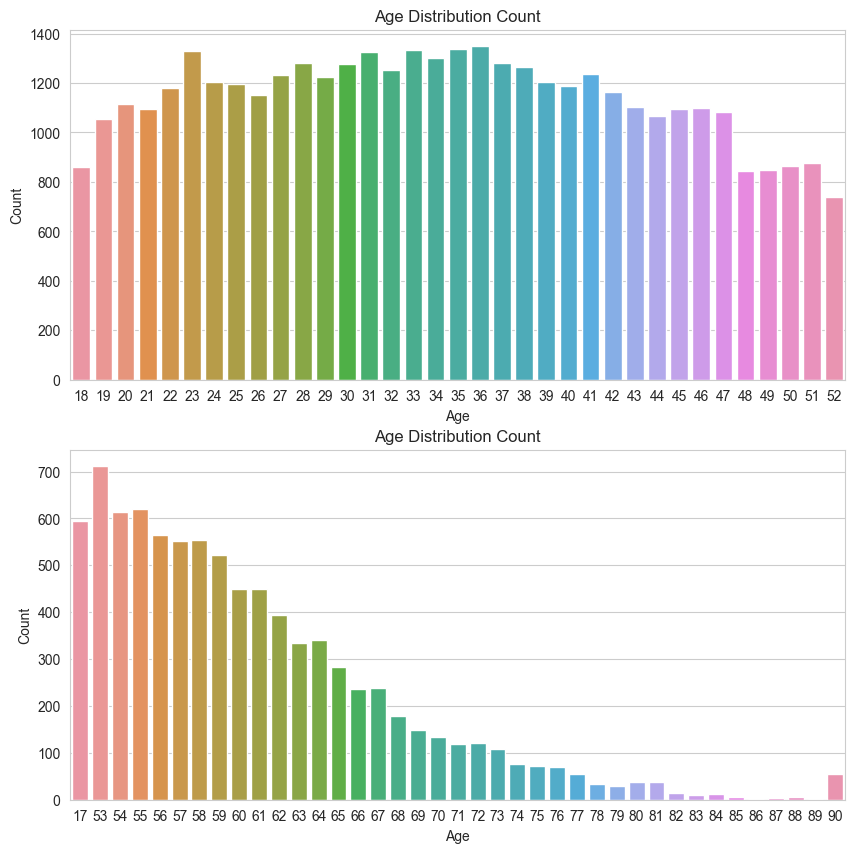

In [96]:
# Plotting Barplot to understand count of various age groups

plt.figure(figsize = (10,10))

x = list(df['age'].value_counts().index)

y = list(df['age'].value_counts())

plt.subplot(2,1,1)
sns.barplot(x= x[:35], y=y[:35])
plt.title('Age Distribution Count')
plt.xlabel('Age')
plt.ylabel('Count')


plt.subplot(2,1,2)
sns.barplot(x= x[35:], y=y[35:])
plt.title('Age Distribution Count')
plt.xlabel('Age')
plt.ylabel('Count')


plt.show()

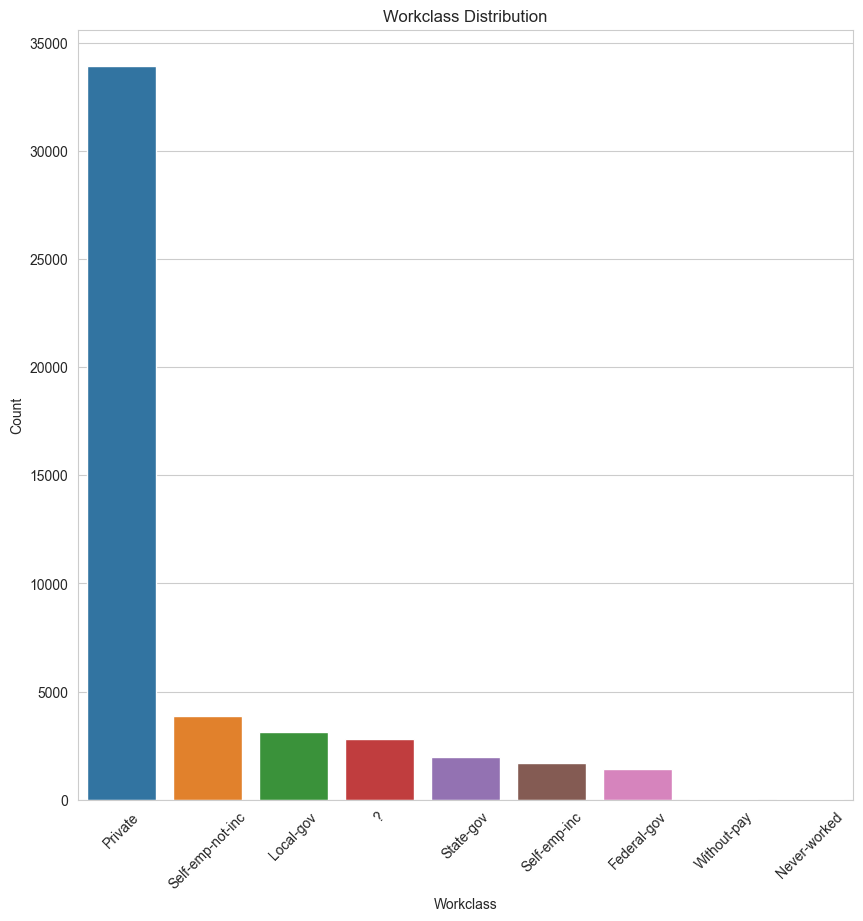

In [97]:
# Understanding Workclass of the population

plt.figure(figsize = (10,10))

x = list(df['workclass'].value_counts().index)

y = list(df['workclass'].value_counts())

plt.title('Workclass Distribution')

plt.xlabel('Workclass')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation=45)

plt.show()

Among the workclass, private has the  highest majority.Very few percent of Workclass belongs to other categories.

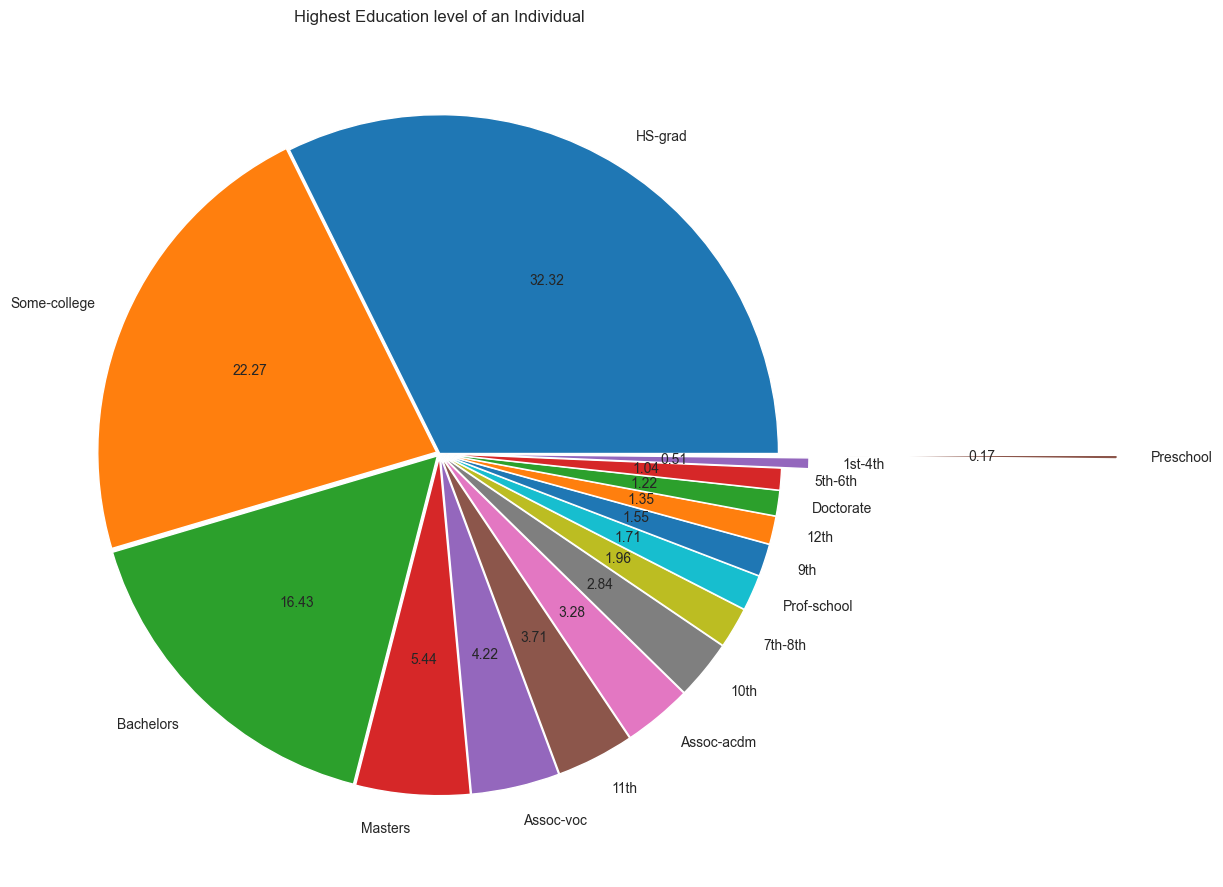

In [98]:
# Education Column

plt.figure(figsize=(11,11))

#ex = [0.01]*16

ex = [0.0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.09,1]

x = list(df['education'].value_counts())

y = list(df['education'].value_counts().index)

plt.pie(x,labels=y,autopct='%.2f',explode=ex)

plt.title('Highest Education level of an Individual')

plt.show()

Majority of highest education level is HS Grad

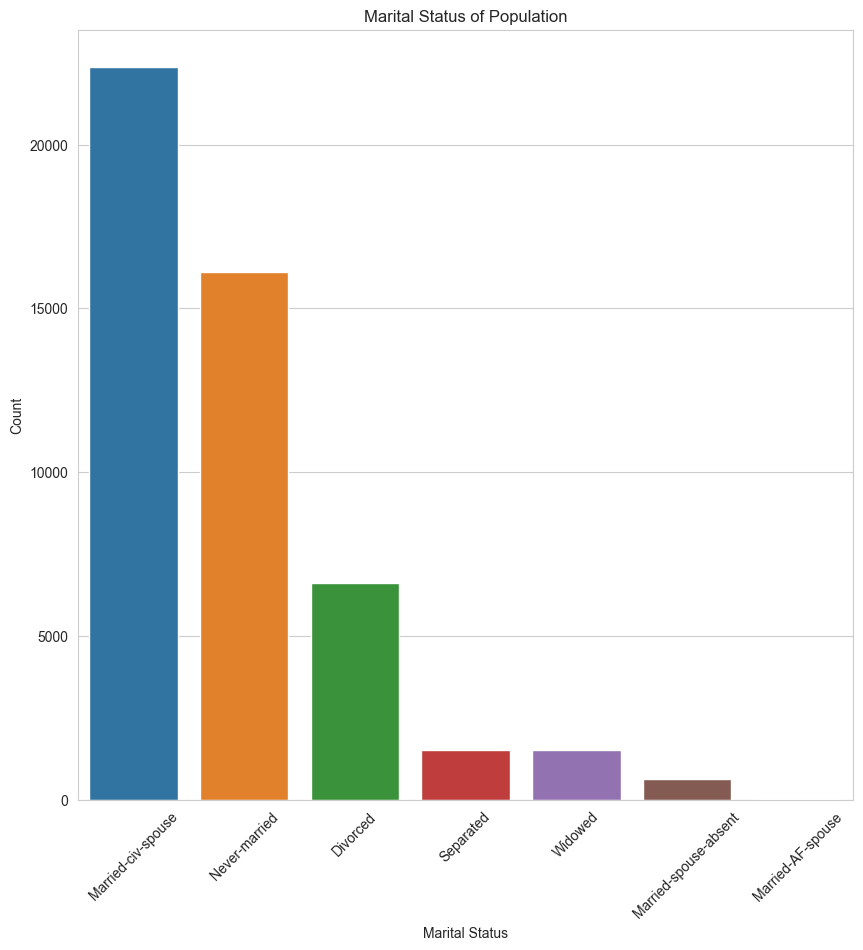

In [99]:
# Checking Marital Status of Individual

plt.figure(figsize = (10,10))

x = list(df['marital-status'].value_counts().index)

y = list(df['marital-status'].value_counts())

plt.title('Marital Status of Population')

plt.xlabel('Marital Status')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation = 45)

plt.show()

From Marital Status of Individual we can see that Married-civ-spouse has highest majority.

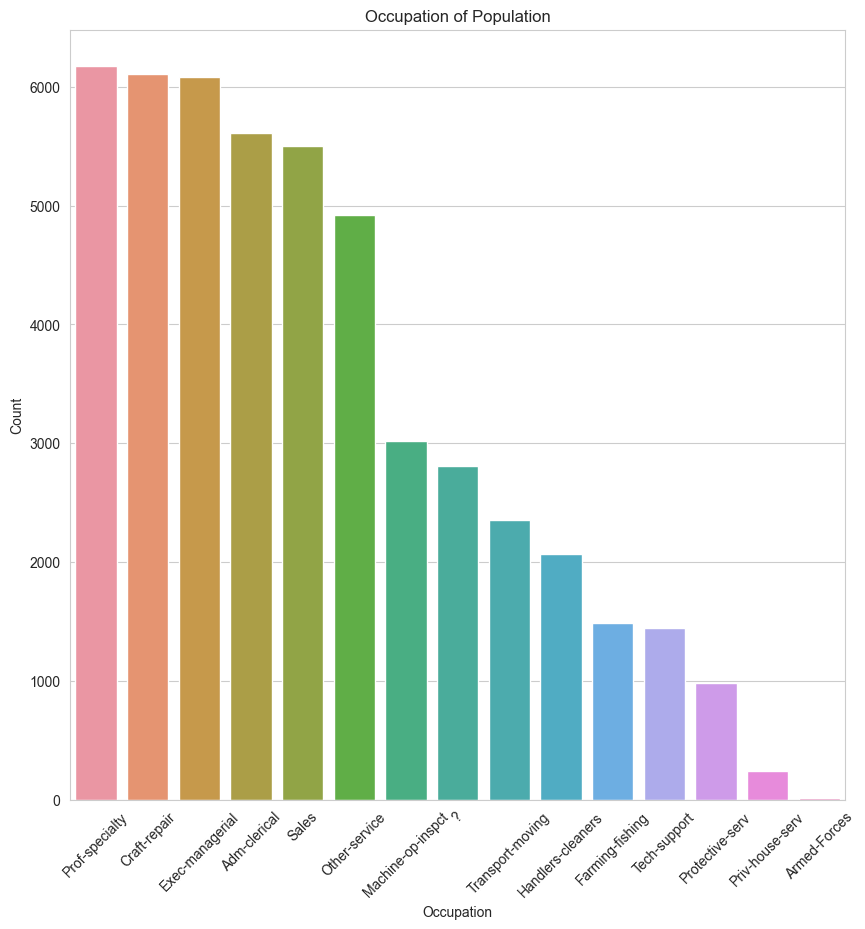

In [100]:
# Occupation Designation Distribution

plt.figure(figsize = (10,10))

x = list(df['occupation'].value_counts().index)

y = list(df['occupation'].value_counts())

plt.title('Occupation of Population')

plt.xlabel('Occupation')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation = 45)

plt.show()

Prof-specialty has highest majority incase of occupation.

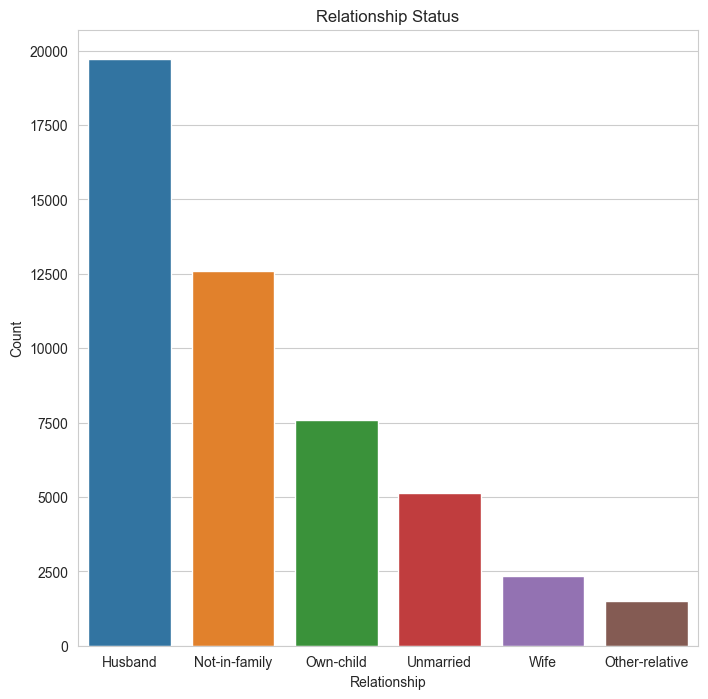

In [101]:
# Checking Relationship Status 

plt.figure(figsize = (8,8))

x = list(df['relationship'].value_counts().index)

y = list(df['relationship'].value_counts())

plt.title('Relationship Status')

plt.xlabel('Relationship')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

#plt.xticks(rotation = 45)

plt.show()

from the relationship status we come to know that husband has the highest majority.


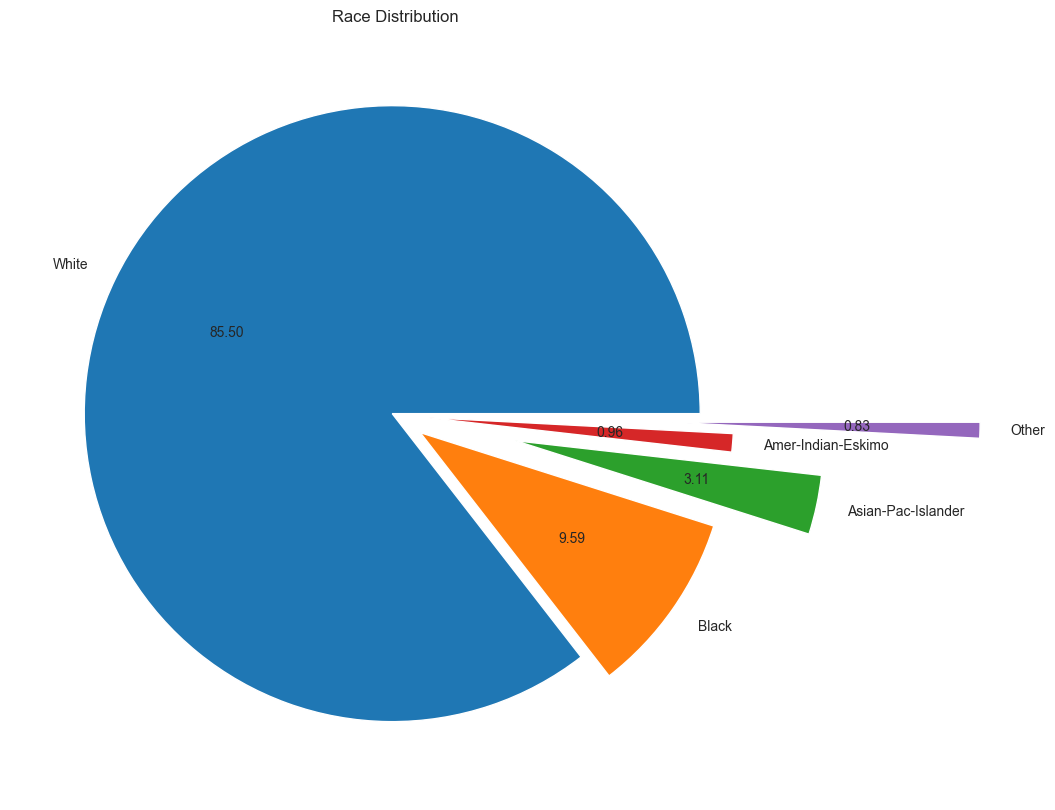

In [102]:
# Pie Chart to understand Race Distribution

plt.figure(figsize=(10,10))

ex = [0.01,0.1,0.4,0.1,0.9]

x = list(df['race'].value_counts())

y = list(df['race'].value_counts().index)

plt.pie(x,labels=y,autopct='%.2f',explode=ex)

plt.title('Race Distribution')

plt.show()

Among the race distribution, Whites are in majority.

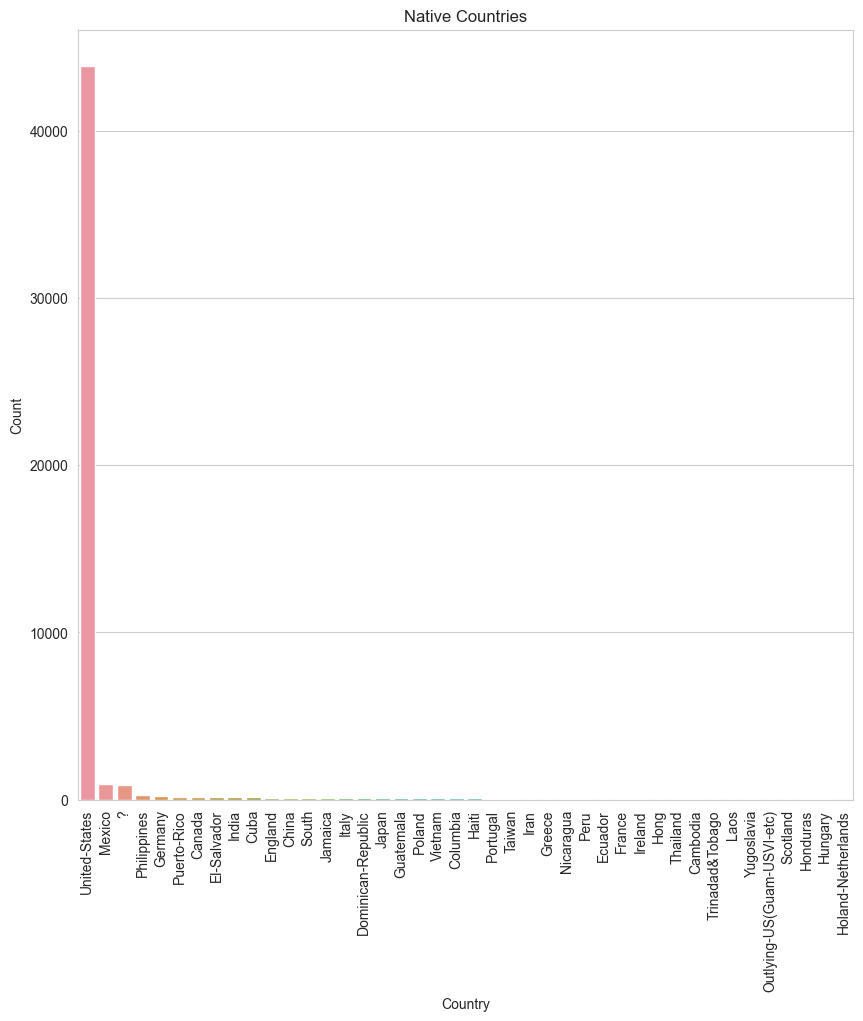

In [103]:
# Native Countries Distribution

plt.figure(figsize = (10,10))

x = list(df['native-country'].value_counts().index)

y = list(df['native-country'].value_counts())

plt.title('Native Countries')

plt.xlabel('Country')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation = 90)

plt.show()

Among the native country,United-states has highest majority.

# Bivariate Analysis


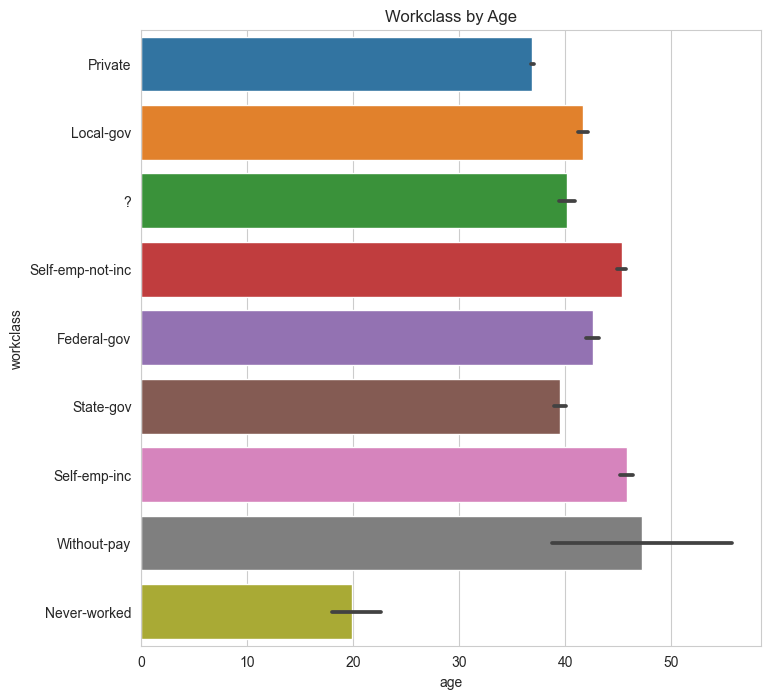

In [104]:
# Workclass by Age Distribution

plt.figure(figsize=(8,8))

sns.barplot(y='workclass',x='age',data=df)

plt.title('Workclass by Age')

plt.show()

Majority of person with 40+ age are without pay and people below 20 have never worked.

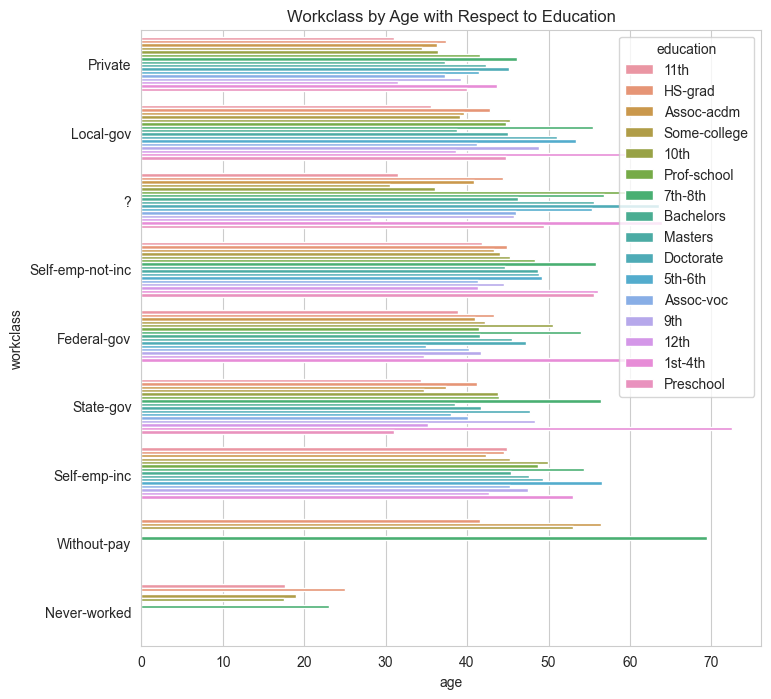

In [105]:
# Workclass by Age with Respect to Education Distribution

plt.figure(figsize=(8,8))

sns.barplot(y='workclass',x='age',hue='education',ci=None,data=df)

plt.title('Workclass by Age with Respect to Education')

plt.show()

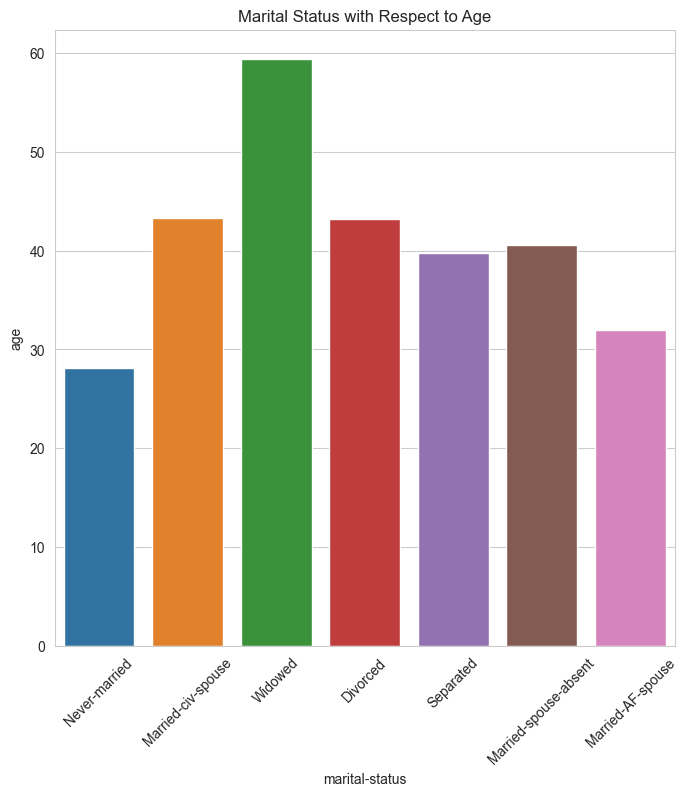

In [106]:
# Marital Status by Age Distribution

plt.figure(figsize=(8,8))

sns.barplot(x='marital-status',y='age',ci=None,data=df)

plt.title('Marital Status with Respect to Age')

plt.xticks(rotation=45)

plt.show()

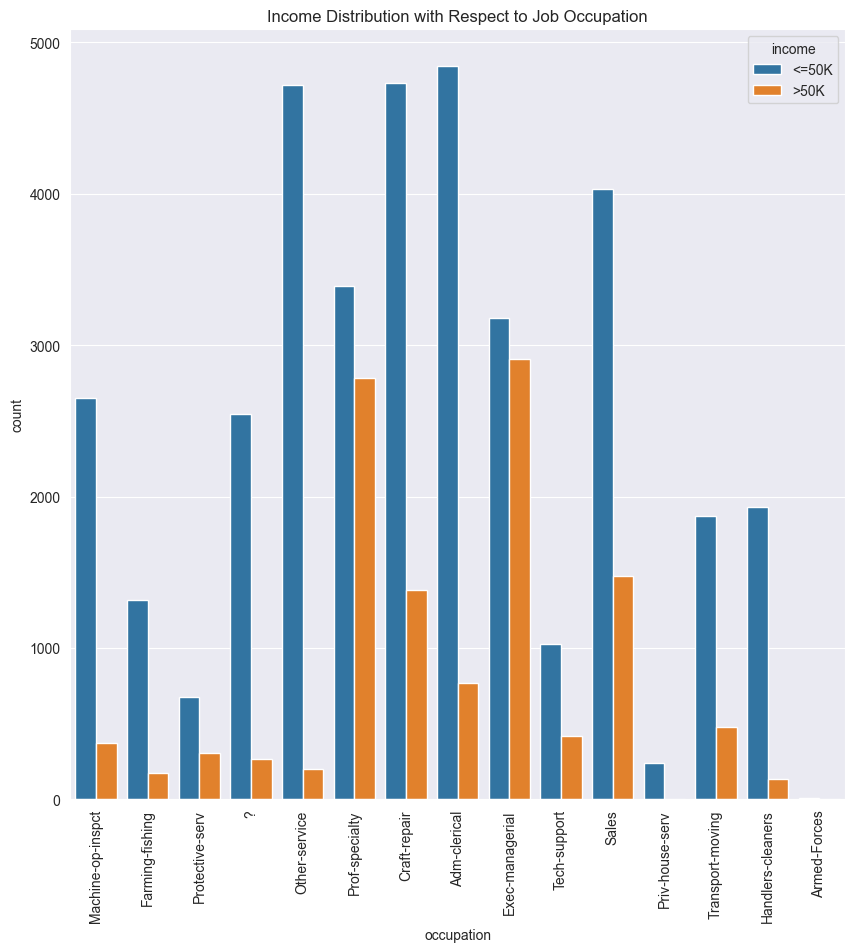

In [107]:
# Job Occupation with Respect to Income

plt.figure(figsize=(10,10))

sns.set_style('darkgrid')

sns.countplot(x='occupation',hue='income',data=df)

plt.title('Income Distribution with Respect to Job Occupation')

plt.xticks(rotation=90)

plt.show()


Job Occupation with Respect to Income is high for Adm-Clerical income <=50K.

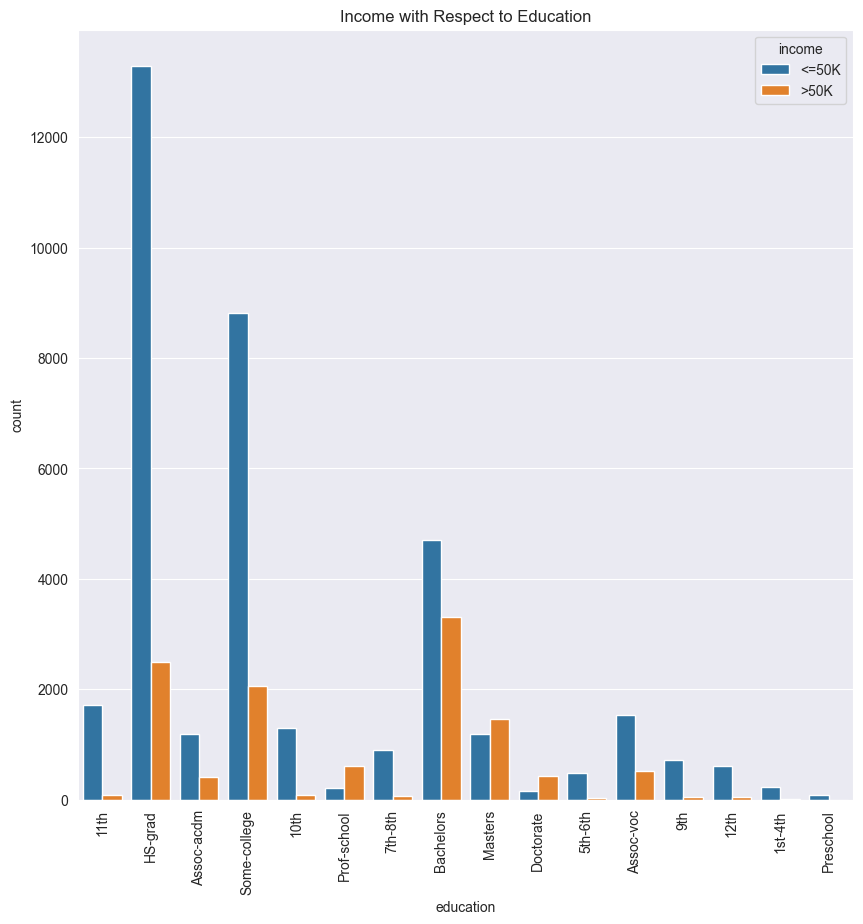

In [108]:
# Income with Respect to Education Level

plt.figure(figsize=(10,10))

sns.set_style('darkgrid')

sns.countplot(x='education',hue='income',data=df)

plt.title('Income with Respect to Education')

plt.xticks(rotation=90)

plt.show()

Income with Respect to Education Level is high for HS-grad income <=50k.

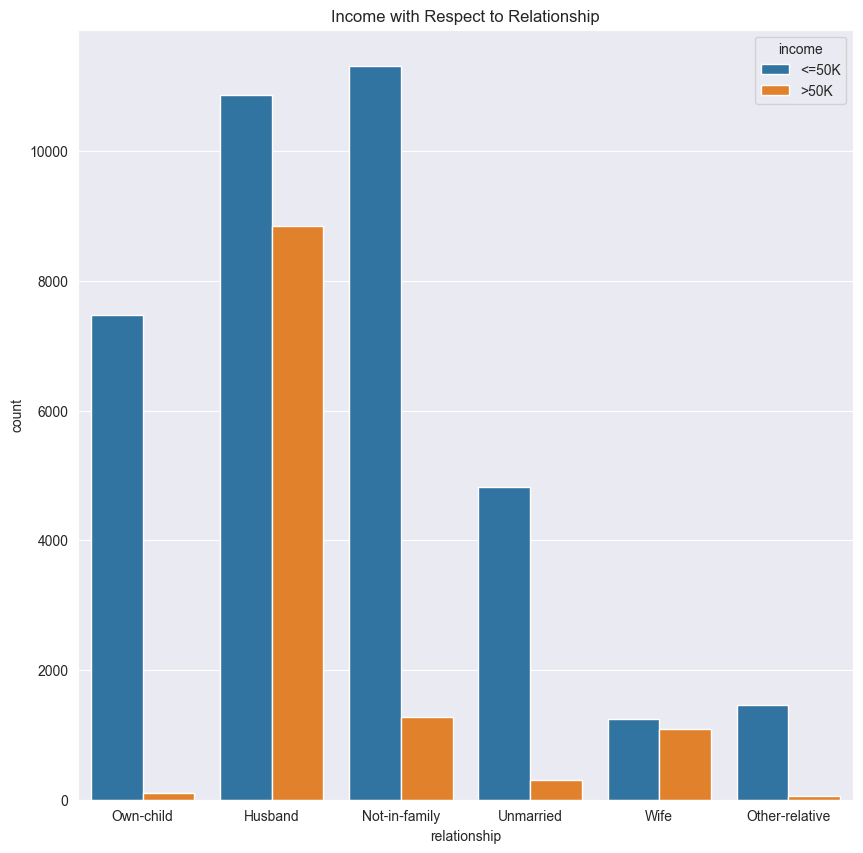

In [109]:
# Income with Respect to Relationship Status

plt.figure(figsize=(10,10))

sns.set_style('darkgrid')

sns.countplot(x='relationship',hue='income',data=df)

plt.title('Income with Respect to Relationship')

plt.show()

Income with Respect to Relationship Status is high for Not-in-family income <=50k.

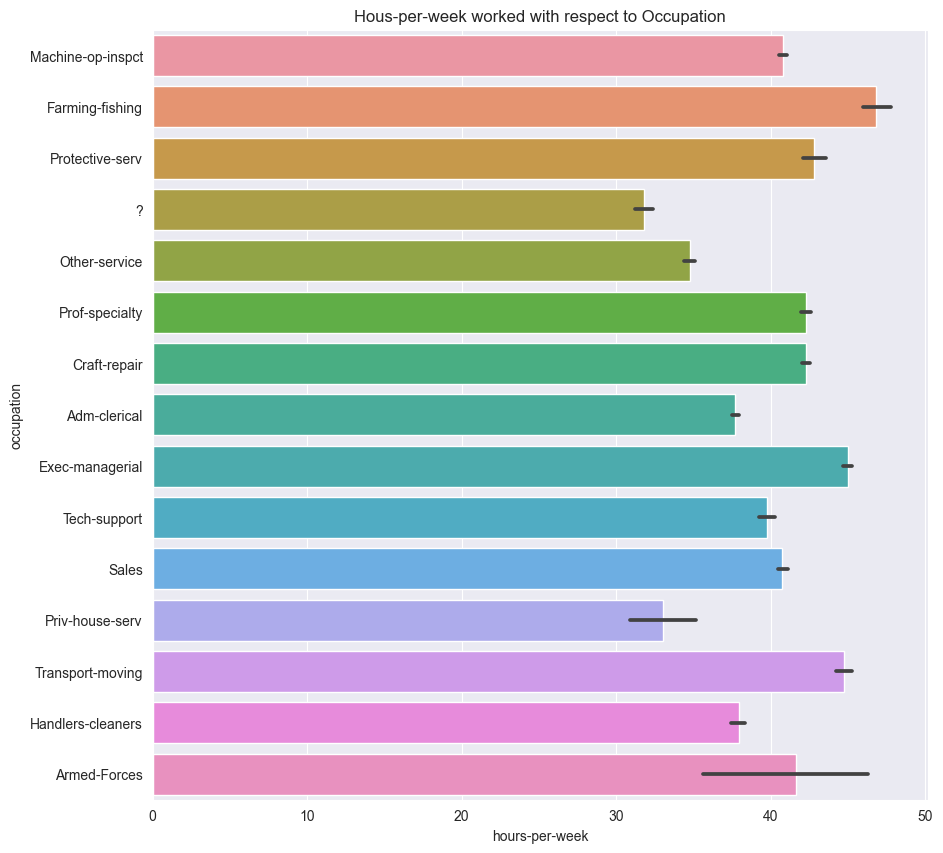

In [110]:
# Hours per week with Respect to Occupation

plt.figure(figsize=(10,10))

sns.set_style('darkgrid')

sns.barplot(x='hours-per-week',y='occupation',data=df)

plt.title('Hous-per-week worked with respect to Occupation')

plt.show()

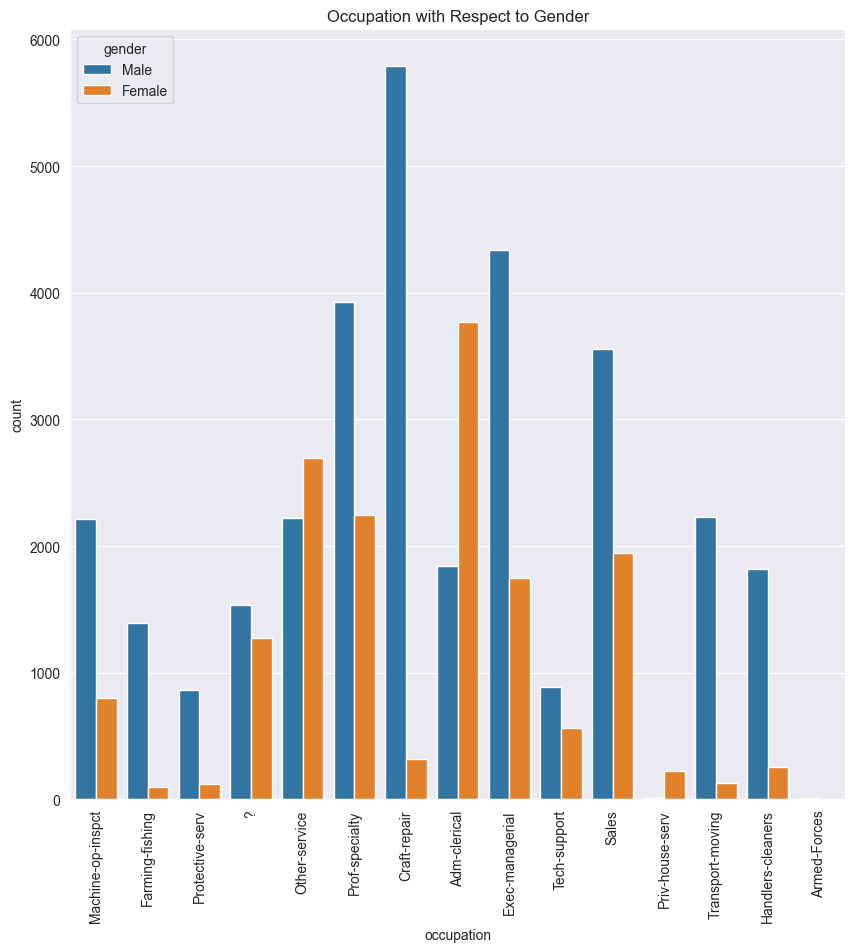

In [111]:
# Occupation with Respect to Gender

plt.figure(figsize=(10,10))

sns.set_style('darkgrid')

sns.countplot(x='occupation',hue='gender',data=df)

plt.title('Occupation with Respect to Gender')

plt.xticks(rotation=90)

plt.show()

Occupation with Respect to Gender is high for Male Craft-repair.



In [112]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [113]:
# Percentage of Working Male & female
percent = (df['gender'].value_counts() / df.shape[0] ) * 100
percent


Male      66.848204
Female    33.151796
Name: gender, dtype: float64

In [114]:
# Distribution of Income

df['income_category'] = ''

df.loc[df['income'] == '>50K', ['income_category']] = 'high income'

df.loc[df['income'] == '<=50K', ['income_category']] = 'low income'

df.loc[:, 'income_category'].head()

0     low income
1     low income
2    high income
3    high income
4     low income
Name: income_category, dtype: object

In [115]:
# Pivot table of Racewise Gender Distribution of Income

racewise_income = df.pivot_table(values=['income_category'], index=['income', 'race', 'gender'], aggfunc = 'count')
racewise_income

income_category
income race               gender                 
<=50K  Amer-Indian-Eskimo Female              170
                          Male                245
       Asian-Pac-Islander Female              448
                          Male                662
       Black              Female             2176
                          Male               1943
       Other              Female              144
                          Male                212
       White              Female            11485
                          Male              19670
>50K   Amer-Indian-Eskimo Female               15
                          Male                 40
       Asian-Pac-Islander Female               69
                          Male                340
       Black              Female              132
                          Male                434
       Other              Female               11
                          Male                 39
       White              Female             1542
                          Male               9065

In [116]:
# Getting the count of Workclass & Gender based upon income

df.pivot_table(values=['income'], index=['workclass', 'gender'], aggfunc='count')

income
workclass        gender        
?                Female    1270
                 Male      1529
Federal-gov      Female     452
                 Male       980
Local-gov        Female    1258
                 Male      1878
Never-worked     Female       3
                 Male         7
Private          Female   11599
                 Male     22307
Self-emp-inc     Female     211
                 Male      1484
Self-emp-not-inc Female     629
                 Male      3233
State-gov        Female     763
                 Male      1218
Without-pay      Female       7
                 Male        14

### Feature Engineering

We have encountered many missing values and outliers while exploring the data. Now er have to remove these anamolies in order to feed clean data to our Machine Learning Model

### Missing Value Treatment

In [117]:
# Null values exist in the dataset in the form of '?'

# Replacing ? with np.nan
columns = list(df.columns)

for col in columns:
    
    df[col] = df[col].replace('?',np.nan)


In [118]:
# Now we can see the null values 

a = df.isnull().any()

print(a)

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
income_category    False
dtype: bool


In [119]:
# Checking Total Missing values in columns containing missing values

li = list(a.index)

count = 0

null_count = {}

for col in li:
    
    if df[col].isnull().any() == True:
       
        count = df[col].isnull().sum()
        
        null_count[col] = count

print(null_count)


{'workclass': 2799, 'occupation': 2809, 'native-country': 857}


In [120]:
# Dropping Null values

df = df.loc[df['native-country'].notnull(), :]

df = df.loc[df['occupation'].notnull(), :]

df = df.loc[df['workclass'].notnull(), :]


In [121]:
df.isnull().any() # Removed Null values

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
income_category    False
dtype: bool

In [122]:
# Checking the shape of the dataset after the Null value treatment

df.shape

(45222, 16)

In [123]:
# Percentage of rows lost in data cleaning.

percent = (48842 - len(df.index)) * 100 / 48842

print('Percentage of Rows Lost: {}'.format(percent))


Percentage of Rows Lost: 7.411653904426518


In [124]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_category'],
      dtype='object')

In [125]:
# Dropping columns fnlwgt , capital-gain , and capital-loss as they are insignificant for us to derive any conclusions.

df.drop(columns=['fnlwgt','capital-gain','capital-loss','income_category'],axis=1,inplace=True)

df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [126]:
numeric_data = df.select_dtypes(['int64','float64']).columns
numeric_data

Index(['age', 'educational-num', 'hours-per-week'], dtype='object')

In [127]:
# Number of Outliers in each feature (Numerical)

outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentage']) # Creating a new dataframe
    
for column in list(numeric_data): # Iterating thorough each feature 
        
    # first quartile (Q1)
    q1 = df[column].quantile(0.25) 
            
    # third quartile (Q3)
    q3 = df[column].quantile(0.75)
            
    # IQR
    iqr = q3 - q1
        
    fence_low = q1 - (1.5*iqr)
        
    fence_high = q3 + (1.5*iqr)
        
    # finding the number of outliers using 'and(|) condition. 
    total_outlier = df[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]
    
    percent = (total_outlier / len(df[column])) * 100
        
    outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,Feature,Number of Outliers,Percentage
0,age,269,0.594843
1,educational-num,294,0.650126
2,hours-per-week,11899,26.312414


We can observe that hours per week column contains a high percentage of outliers. Rest all columns contains low percentage of outliers

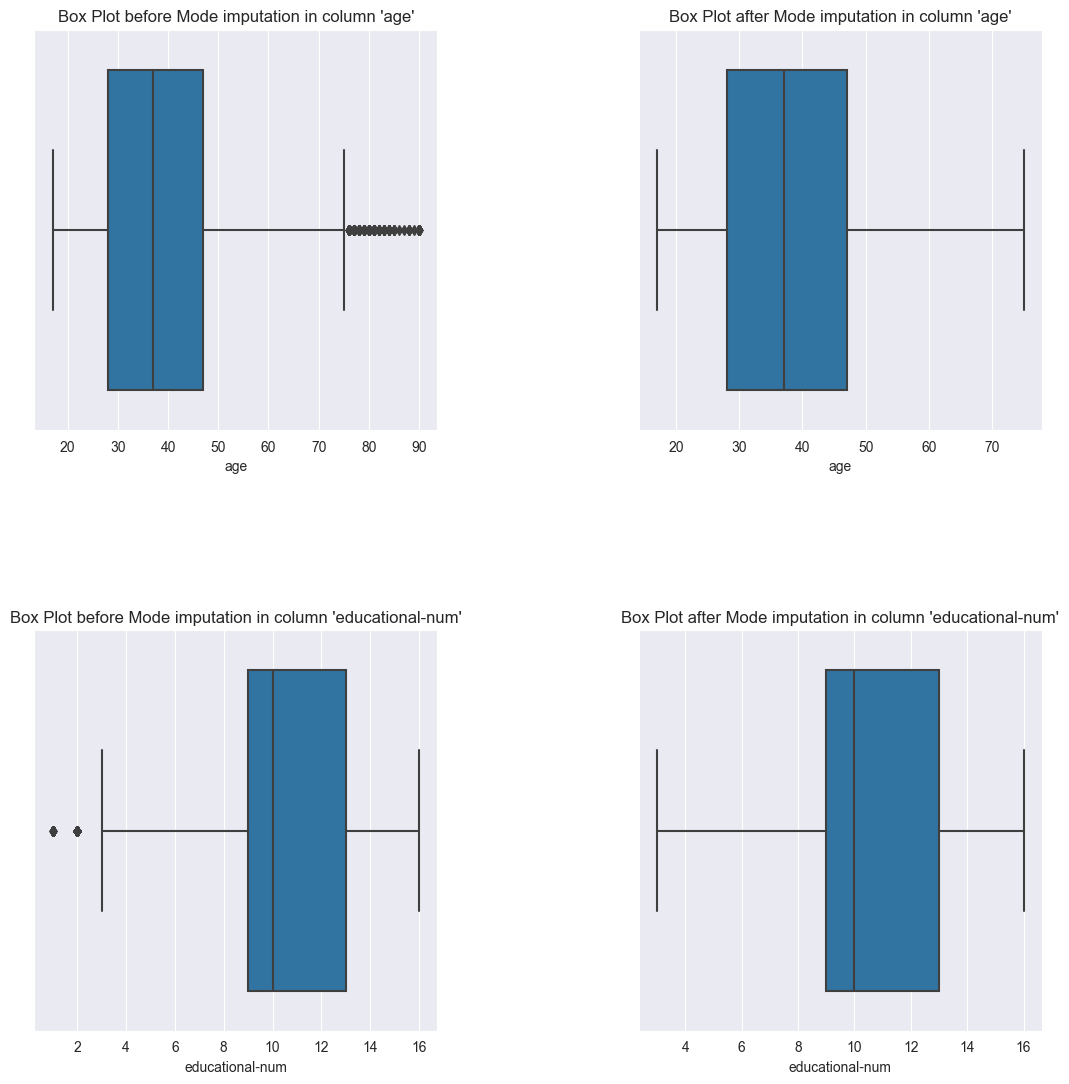

In [128]:
# Imputation - Imputing mode in columns having low percentage of outliers

plt.figure(figsize=(13,13))

plt.subplots_adjust(wspace=0.5,hspace=0.5)

cols = list(outliers['Feature'].iloc[:2].values)

i = 1

for col in cols:

    plt.subplot(2,2,i)
    sns.boxplot(df[col])
    plt.title("Box Plot before Mode imputation in column '{}'".format(col))

    # Replacing Outliers
    q1 = df[col].quantile(0.25)
    
    q3 = df[col].quantile(0.75)
    
    # Iqr
    iqr = q3-q1
    
    Lower_tail = q1 - 1.5 * iqr
    
    Upper_tail = q3 + 1.5 * iqr
    
    m = df[col].mode()[0]
    
    for val in df[col]:
        
        if val > Upper_tail or val < Lower_tail:
            
                df[col] = df[col].replace(val, m)
    
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col])
    plt.title("Box Plot after Mode imputation in column '{}'".format(col))
    
    i = i+2

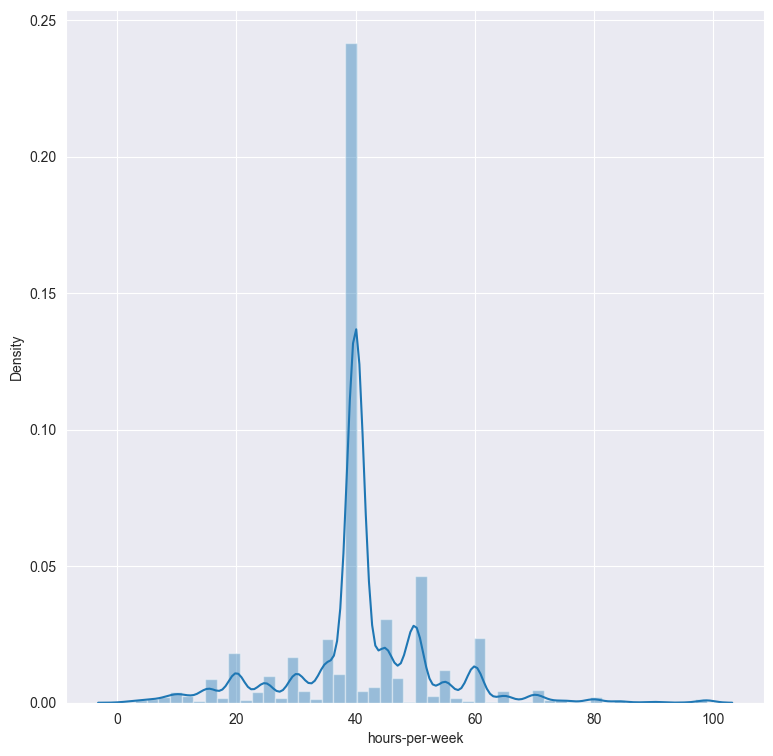

In [129]:
# Treating Outliers in Hours-per-week Column

# Hours-per-week Distribution

plt.figure(figsize=(9,9))

sns.distplot(df['hours-per-week'])

plt.show()

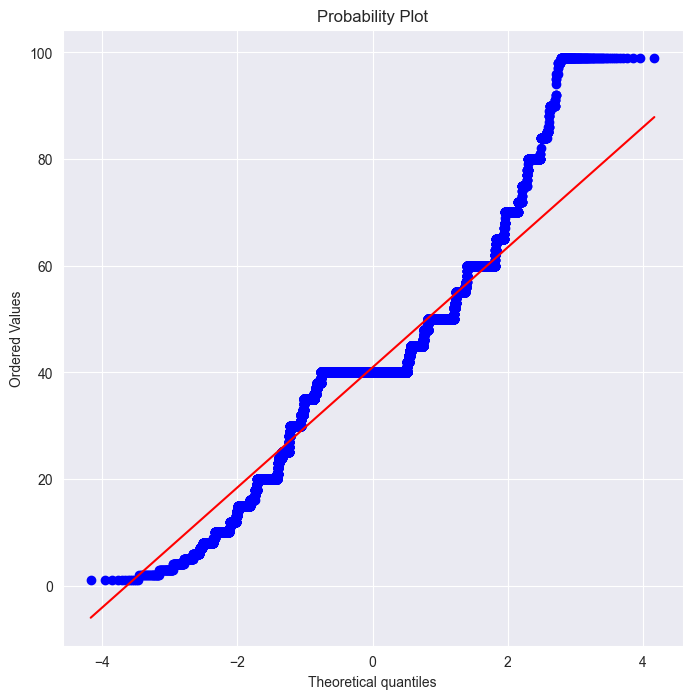

In [130]:

# Checking Normality using QQ plot

plt.figure(figsize=(8,8))

stats.probplot(df['hours-per-week'] , dist = 'norm' , plot = plt)

plt.show()

In [131]:
# Box-Cox transformation in hours-per-week column

data = np.array(df['hours-per-week'])

x_t1, l1 = stats.boxcox(data)
x_t1

array([34.66006967, 43.16400616, 34.66006967, ..., 34.66006967,
       17.34273856, 34.66006967])

In [132]:
l1

0.957404248835031

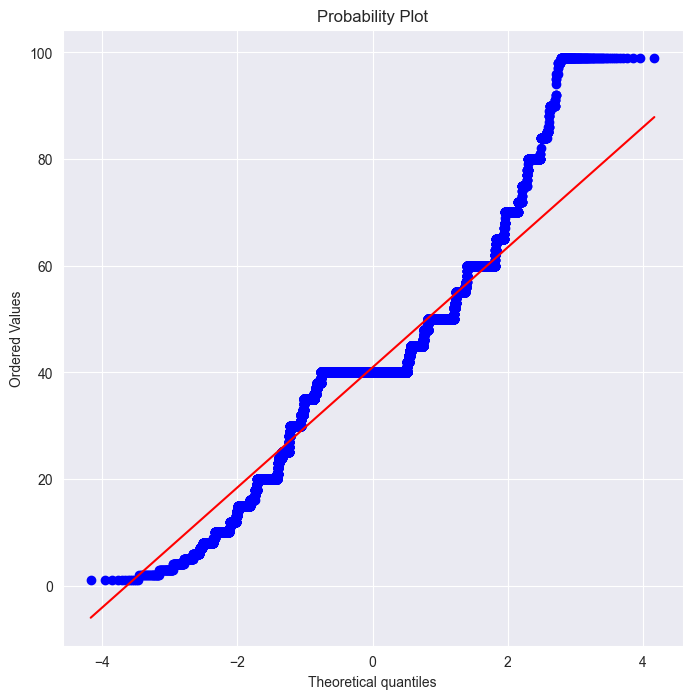

In [133]:
# Propability Plot

plt.figure(figsize=(8,8))

stats.probplot(data , dist = 'norm' , plot = plt)

plt.show()

We can infer that Box-Cox Transformation doesnot significantly helps in Outlier Treatment

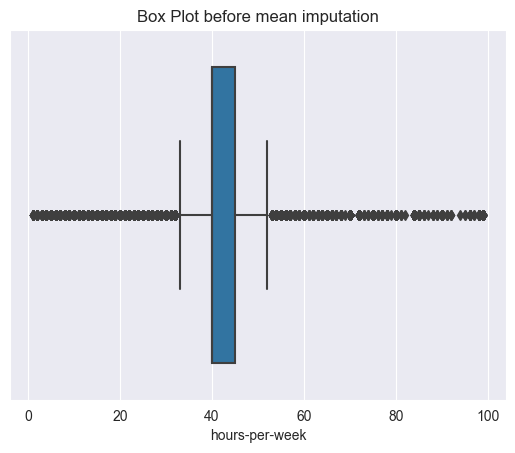

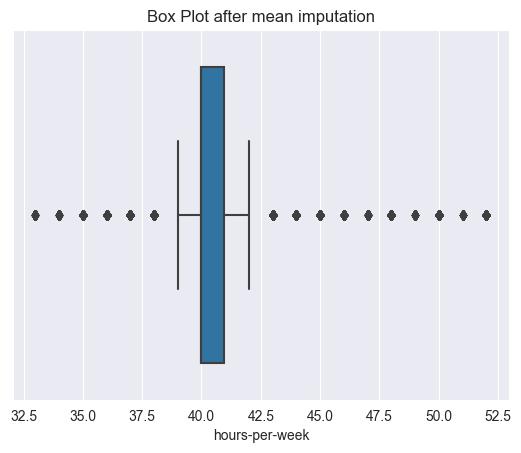

In [134]:
# Mean Imputation in column hours-per-week

sns.boxplot(df['hours-per-week'])

plt.title("Box Plot before mean imputation")
plt.show()
q1 = df['hours-per-week'].quantile(0.25)
q3 = df['hours-per-week'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df['hours-per-week'])
for i in df['hours-per-week']:
    if i > Upper_tail or i < Lower_tail:
            df['hours-per-week'] = df['hours-per-week'].replace(i, m)
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot after mean imputation")
plt.show() 

There were many outliers and missing values and skewed data with in the dataset.

The outliers, missing data, skew data was treated and made sure the data was clean to Initialize the train-test-split and built models.

In [135]:
# Data preprocessing - Standardising Numerical Columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical = df.select_dtypes(include=['int64', 'float64'])
    
df_num = pd.DataFrame(scaler.fit_transform(numerical),columns = numerical.columns)

df_num.head()

,age,educational-num,hours-per-week
0,0.137931,0.307692,0.368421
1,0.362069,0.461538,0.894737
2,0.189655,0.692308,0.368421
3,0.465517,0.538462,0.368421
4,0.293103,0.230769,0.417790


In [136]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

categorical = df.select_dtypes('object')

df_cat = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))

df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [137]:
# Pre-Processed Dataset

train_data = pd.concat([df_num,df_cat], axis = 1)

train_data.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.137931,0.307692,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.362069,0.461538,0.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.189655,0.692308,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.465517,0.538462,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.293103,0.230769,0.417790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [138]:
# Splitting the columns

X = train_data.iloc[:,:-1]

y = train_data.iloc[:,-1]

In [139]:
# Train test Split

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.25, random_state=101)

# MACHINE LEARNING MODELS

In [140]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

# Prediction on Test Dataset

y_pred_lr = lr.predict(X_test)

y_pred_lr

# Model Evaluation

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_lr)


0.8289403856359455

In [141]:
logistic_regression_acc = metrics.accuracy_score(y_test,y_pred_lr)*100
logistic_regression_acc

82.89403856359455

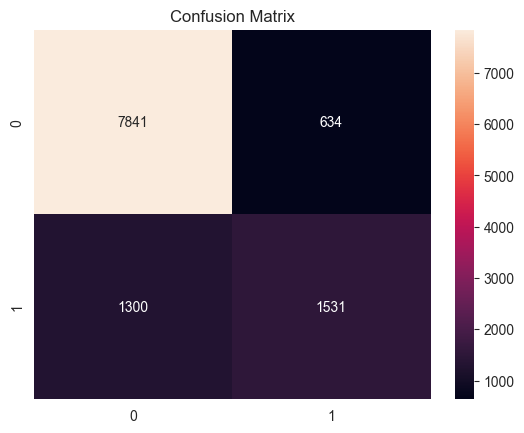

In [142]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()


In [143]:
#Logistic Regression Model Tuning (Using Regularization)

lr_score = {}

for this_C in [0.1, 1, 100]:
    
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    
    score = clf.score(X_test,y_test)
    
    lr_score[this_C] = score
lr_score



{0.1: 0.8287634884132319, 1: 0.8289403856359455, 100: 0.8290288342473023}

No improvement of accuracy in this case even after model tuning



In [144]:
# ROC AUC Score

prob = lr.predict_proba(X_test)

prob = prob[:, 1]

roc_auc_lr = metrics.roc_auc_score(y_test, prob)

print('Logistic Regression ROC_AUC Score : {}'.format(roc_auc_lr))

Logistic Regression ROC_AUC Score : 0.8813306116749974


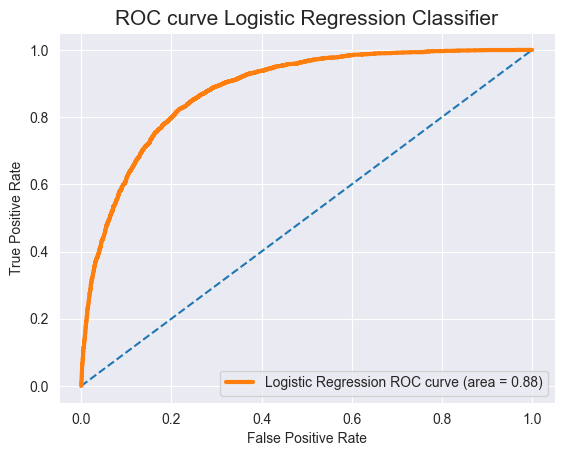

In [145]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(fpr, tpr, lw=3, label='Logistic Regression ROC curve (area = {:0.2f})'.format(roc_auc_lr))

plt.title('ROC curve Logistic Regression Classifier', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()


In [146]:
# K- Nearest Neighbour Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train,y_train)

# Prediction

y_pred_knn = knn.predict(X_test)

y_pred_knn

# Model Evaluation 

print('Accuracy of KNN on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN on training set: 0.86
Accuracy of KNN on test set: 0.81


In [147]:
KNN_acc = metrics.accuracy_score(y_test,y_pred_knn)*100
KNN_acc

81.37272244825756

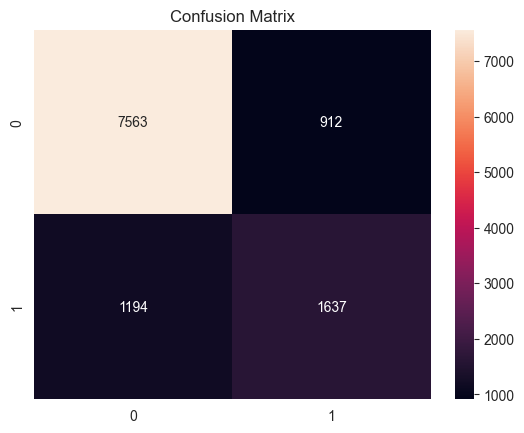

In [148]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [149]:
# ROC AUC Score

prob_knn = knn.predict_proba(X_test)

prob_knn = prob_knn[:, 1]

roc_auc_knn = metrics.roc_auc_score(y_test, prob_knn)

print('KNN ROC_AUC Score : {}'.format(roc_auc_knn))



KNN ROC_AUC Score : 0.8437637658915359


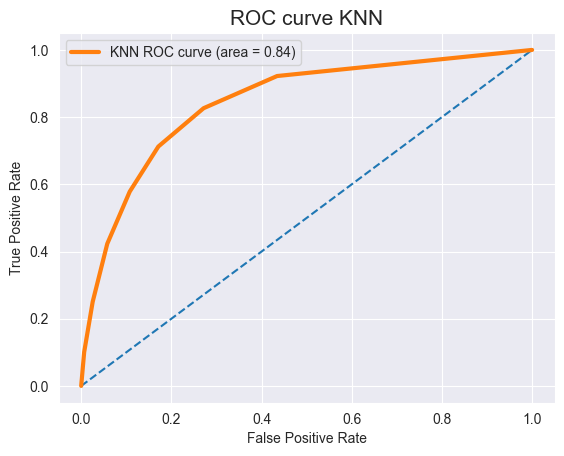

In [150]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_knn)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_knn))

plt.title('ROC curve KNN', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [151]:
# Gaussian Navie Bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

# Prediction on test dataset

y_pred_gnb = nb.predict(X_test)
y_pred_gnb

print('Accuracy of Gaussian NB classifier on training set: {:.2f}'
     .format(nb.score(X_train, y_train)))
print('Accuracy of Gaussian NB classifier on test set: {:.2f}'
     .format(nb.score(X_test, y_test)))



Accuracy of Gaussian NB classifier on training set: 0.58
Accuracy of Gaussian NB classifier on test set: 0.57


In [152]:
Naive_Bayes_acc = metrics.accuracy_score(y_test,y_pred_gnb)*100
Naive_Bayes_acc

57.06704404740846

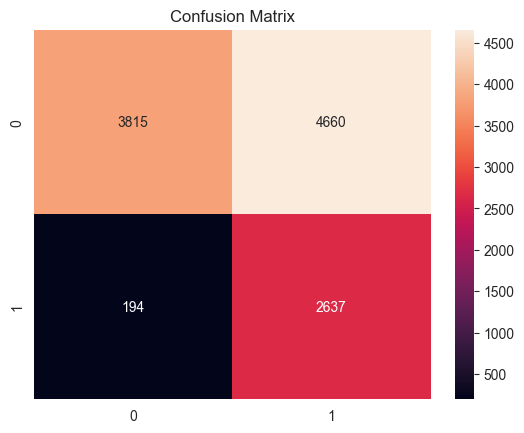

In [153]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [154]:
# ROC AUC Score

prob_nb = nb.predict_proba(X_test)

prob_nb = prob_nb[:, 1]

roc_auc_gnb = metrics.roc_auc_score(y_test, prob_nb)

print('Gaussian NB ROC_AUC Score : {}'.format(roc_auc_gnb))


Gaussian NB ROC_AUC Score : 0.8054412743862983


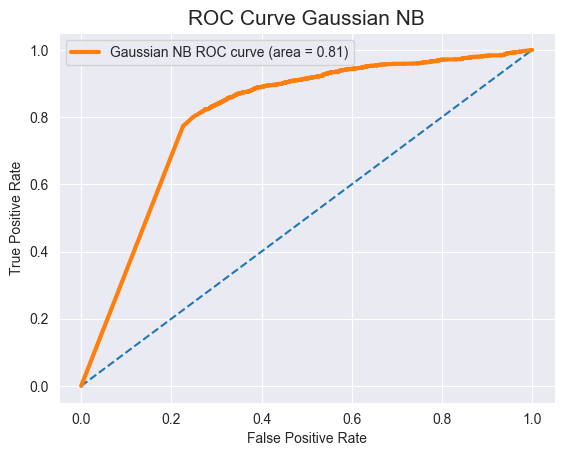

In [155]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_nb)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='Gaussian NB ROC curve (area = {:0.2f})'.format(roc_auc_gnb))

plt.title('ROC Curve Gaussian NB', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [156]:
# Decision tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

# Prediction

y_pred_dt = dt.predict(X_test)
y_pred_dt

# Evaluation of the model 

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.77


In [157]:
DT_acc = metrics.accuracy_score(y_test,y_pred_dt)*100
DT_acc

76.98567132496021

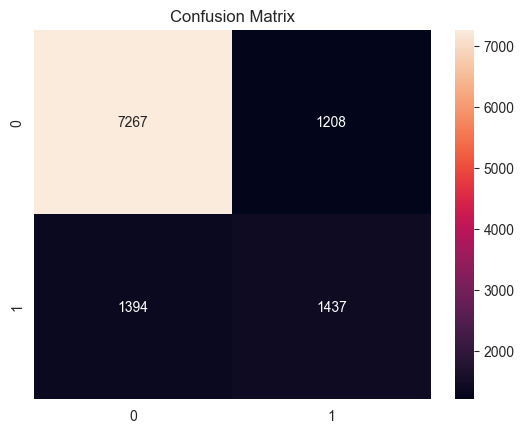

In [158]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [159]:
# ROC AUC Score

prob_dt = dt.predict_proba(X_test)

prob_dt = prob_dt[:, 1]

roc_auc_dt = metrics.roc_auc_score(y_test, prob_dt)

print('Decision Trees ROC_AUC Score : {}'.format(roc_auc_dt))

Decision Trees ROC_AUC Score : 0.7190233081069366


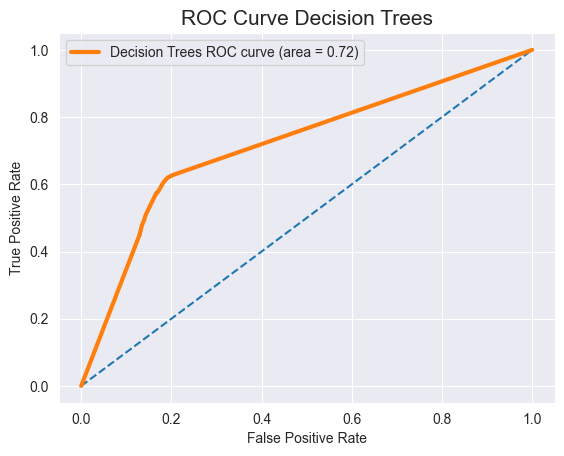

In [160]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_dt)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='Decision Trees ROC curve (area = {:0.2f})'.format(roc_auc_dt))

plt.title('ROC Curve Decision Trees', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [161]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(random_state = 0)

# Fitting the data

gbt.fit(X_train, y_train)

y_pred_gbt= gbt.predict(X_test)
y_pred_gbt




array([0., 1., 0., ..., 0., 0., 0.])

In [162]:

# Model Evaluation

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(gbt.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(gbt.score(X_test, y_test)))


Accuracy of GBDT classifier on training set: 0.84
Accuracy of GBDT classifier on test set: 0.83



In [163]:
GBDT_acc = metrics.accuracy_score(y_test,y_pred_gbt)*100
GBDT_acc

83.33628162037856

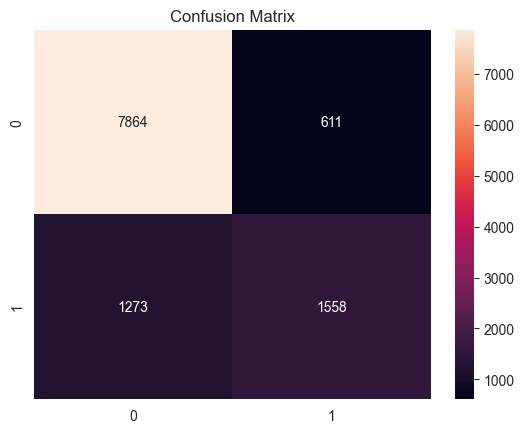

In [164]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_gbt), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [165]:
# ROC AUC Score

prob_gbdt = gbt.predict_proba(X_test)

prob_gbdt = prob_gbdt[:, 1]

roc_auc_gbdt = metrics.roc_auc_score(y_test, prob_gbdt)

print('Gradient Boosting ROC_AUC Score : {}'.format(roc_auc_gbdt))

Gradient Boosting ROC_AUC Score : 0.885794819054526


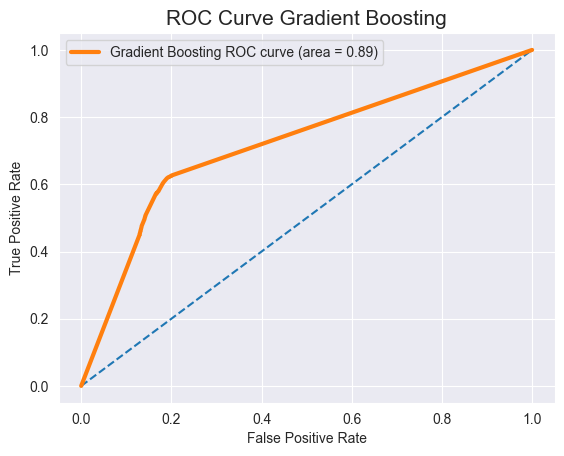

In [166]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_dt)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='Gradient Boosting ROC curve (area = {:0.2f})'.format(roc_auc_gbdt))

plt.title('ROC Curve Gradient Boosting', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [167]:
x = {'Logistic Regression' : logistic_regression_acc,'K Nearest Neighbour': KNN_acc,'Naive Bayes':Naive_Bayes_acc,'decision tree' : DT_acc,'Gradient Boosting':GBDT_acc}

In [168]:
x

{'Logistic Regression': 82.89403856359455,
 'K Nearest Neighbour': 81.37272244825756,
 'Naive Bayes': 57.06704404740846,
 'decision tree': 76.98567132496021,
 'Gradient Boosting': 83.33628162037856}

In [169]:
accuracy = pd.DataFrame.from_dict(x, orient='index',columns=['accuracy'])
accuracy

,accuracy
Logistic Regression,82.894039
K Nearest Neighbour,81.372722
Naive Bayes,57.067044
decision tree,76.985671
Gradient Boosting,83.336282


## GRADIENT BOOSTING Classifier beats the rest with the best performance when we calculate accuracy

##### Comparison of ROC_AUC Score of different models

In [170]:

clfs = {
    'Logistic Regression':roc_auc_lr,
    'KNN':roc_auc_knn,
    'GaussianNB':roc_auc_gnb,
    'DecisionTrees':roc_auc_dt,
    'GBDT':roc_auc_gbdt
}


In [171]:
models_comp_score = pd.DataFrame.from_dict(data = clfs, orient='index',columns=['ROC_AUC Score'])
models_comp_score.sort_values(by='ROC_AUC Score', ascending=False)

,ROC_AUC Score
GBDT,0.885795
Logistic Regression,0.881331
KNN,0.843764
GaussianNB,0.805441
DecisionTrees,0.719023


In [172]:
models_comp_score.index

Index(['Logistic Regression', 'KNN', 'GaussianNB', 'DecisionTrees', 'GBDT'], dtype='object')

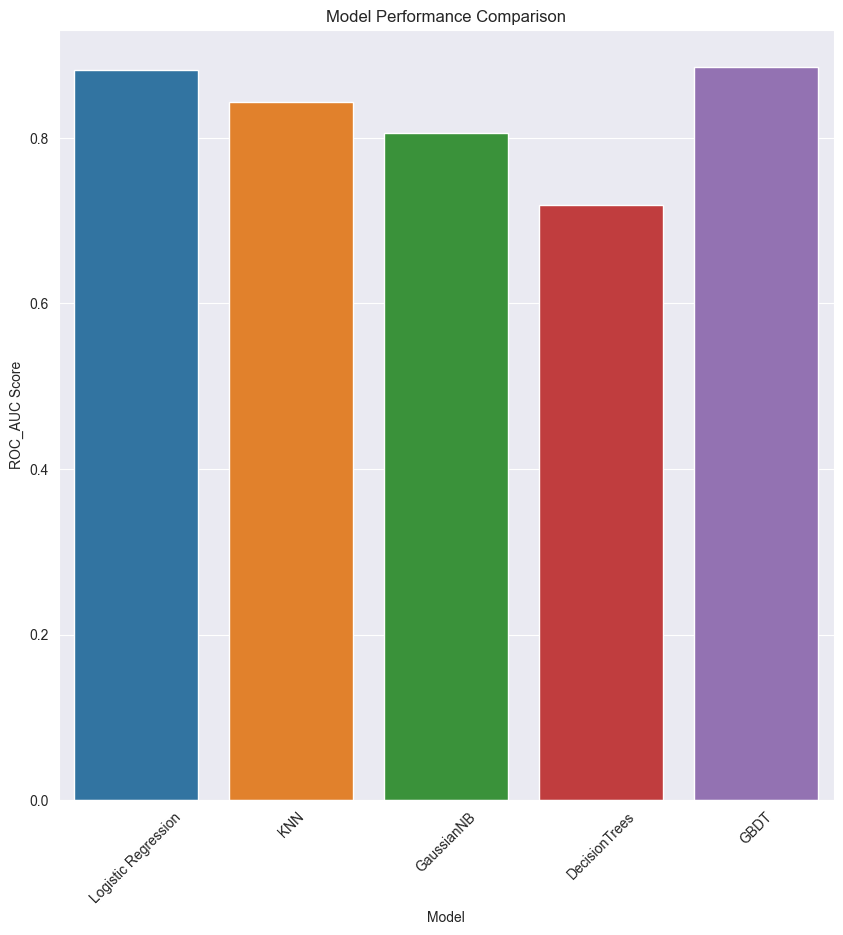

In [173]:
# Plotting Models Performance Bar Plot

plt.figure(figsize=(10,10))

sns.barplot(x=models_comp_score.index , y = models_comp_score['ROC_AUC Score'])

plt.title('Model Performance Comparison')

plt.xlabel('Model')

plt.xticks(rotation=45)

plt.show()

## GRADIENT BOOSTING Classifier beats the rest with the best performance when we calculate ROC_AUC_Score